# Generatives Trainig mit DeepHull loss, generatives und normales Netz trainieren gleichzeitig

In [1]:
import numpy as np
import torch

from script.NeuralNets.Networks import ICNN
from script.NeuralNets.Networks import SequentialNN
from torch.utils.data import DataLoader
from script.dataInit import ConvexDataset, Rhombus
from script.NeuralNets.trainFunction import train_icnn_adversarial
from script.eval import Plots_for
from script.Verification.Verification import verification

In [2]:
icnn = ICNN([2, 10, 10, 1])
adversarial = SequentialNN([2, 10, 10, 2])
epochs = 10
batch_size = 10

number_of_adversarial_samples = 10000
number_of_train_samples = 10000
hyper_lambda = 1
x_range = [-1.5, 1.5]
y_range = [-1.5, 1.5]

In [3]:
included_space, ambient_space = Rhombus().get_uniform_samples(number_of_train_samples, x_range, y_range) #samples will be split in inside and outside the rhombus
true_extremal_points = Rhombus().get_extremal_points()
dataset = ConvexDataset(data=included_space)
train_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
dataset = ConvexDataset(data= ambient_space)
ambient_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

In [4]:
random_samples = []
for i in range(number_of_adversarial_samples): # generate random samples
    x = np.random.default_rng().uniform(low=x_range[0], high=x_range[1])
    y = np.random.default_rng().uniform(low=y_range[0], high=y_range[1])
    random_samples.append([[x, y]])

value = torch.tensor(random_samples, requires_grad=True, dtype=torch.float64)
adversarial_set = ConvexDataset(data=value)
adversarial_loader = DataLoader(adversarial_set, batch_size=batch_size, shuffle=True)


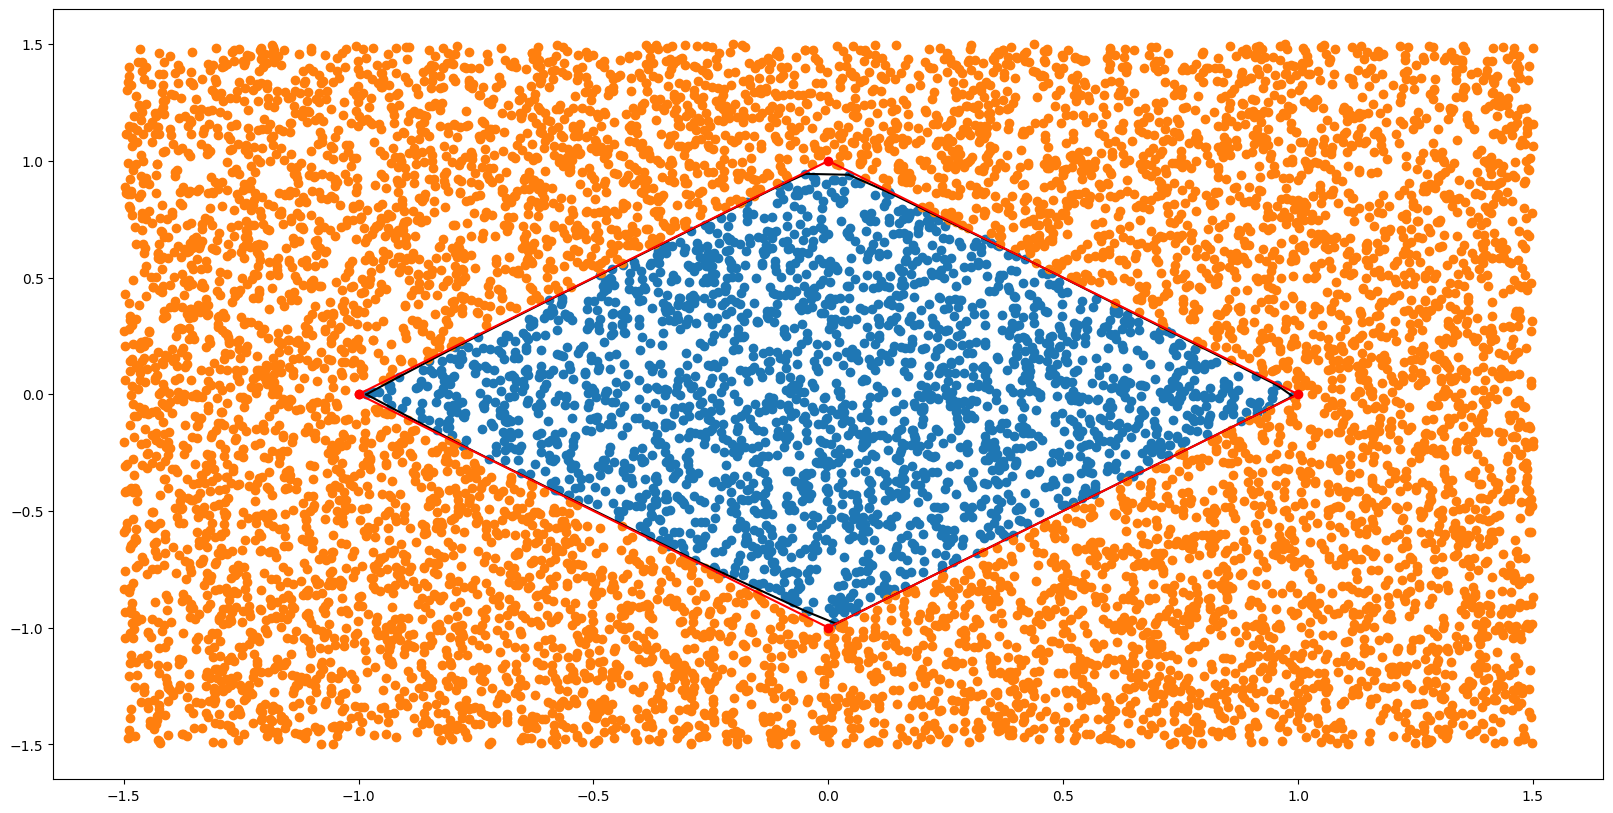

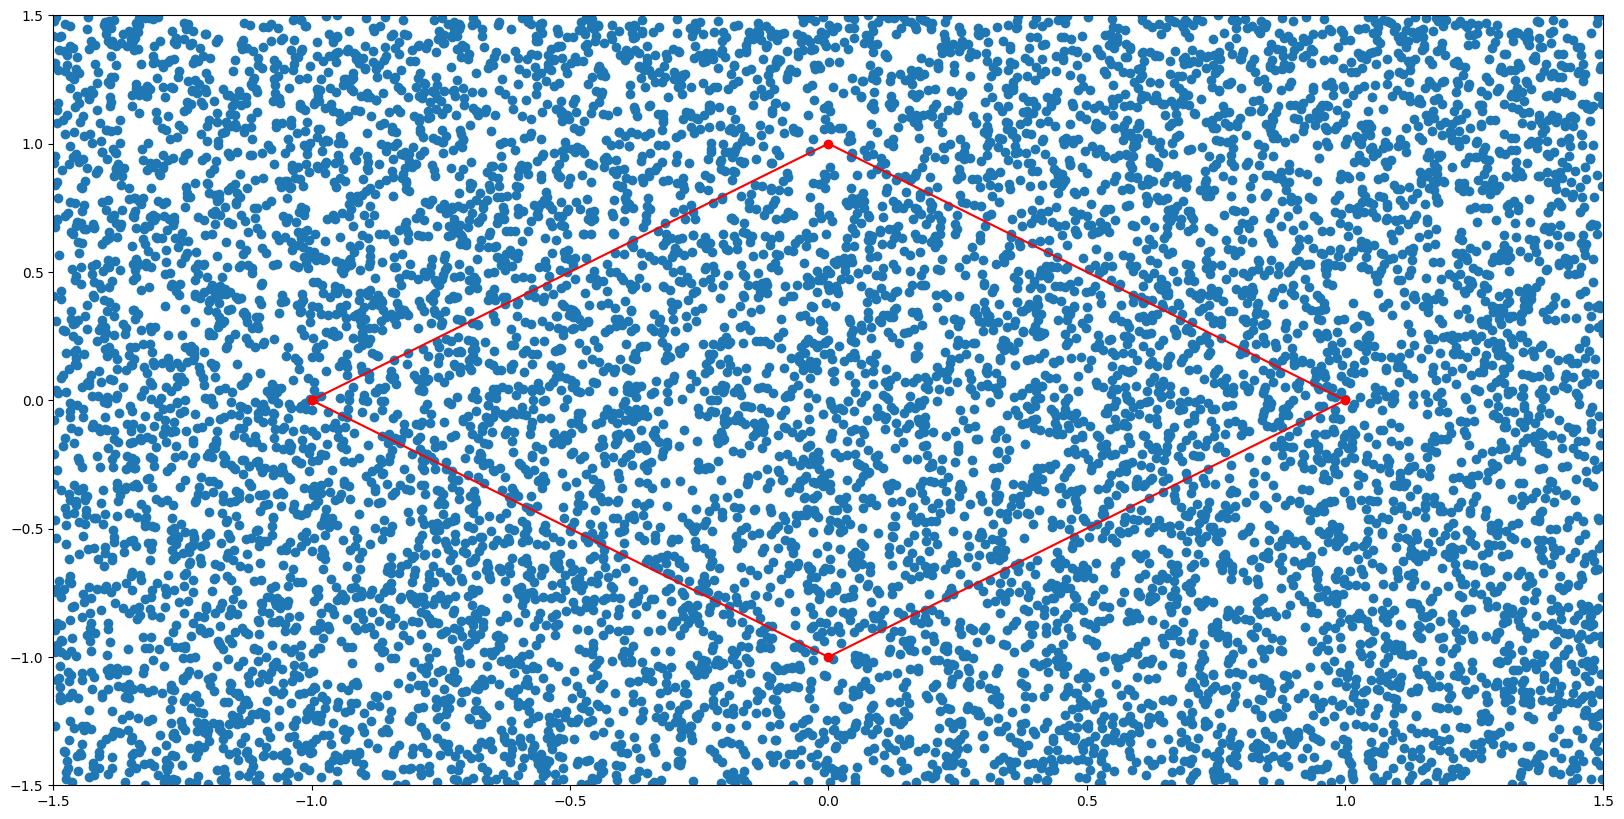

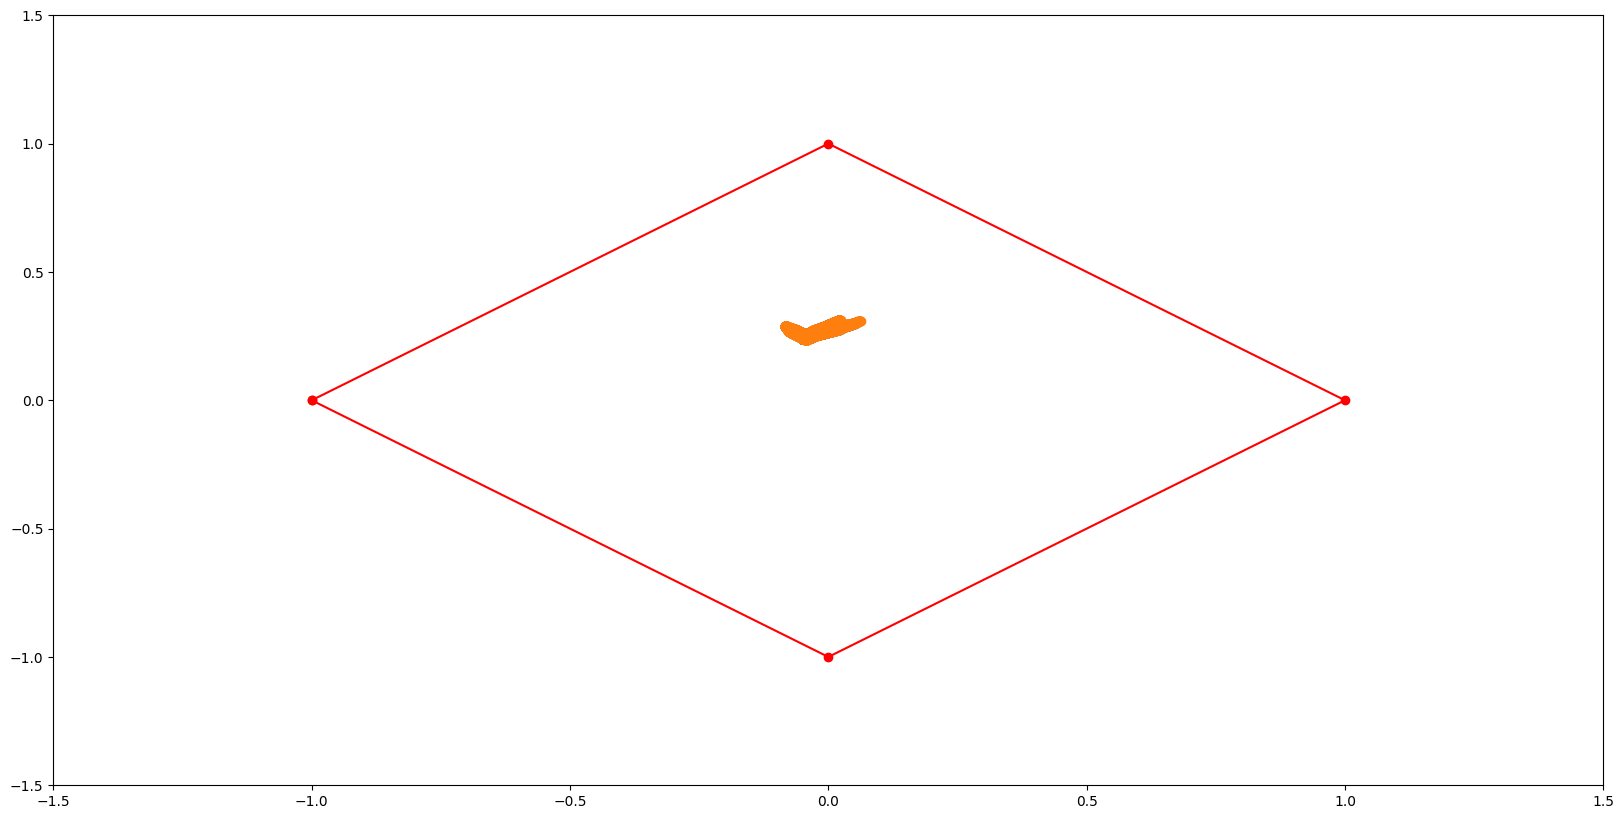

In [5]:
plots = Plots_for(0, icnn, included_space, ambient_space, true_extremal_points, x_range, y_range, adversarial=adversarial, adversarial_values=value)
plots.plt_initial()

plots.plt_adversarial_initial()
plots.plt_adversarial_dotted()


In [6]:
history = train_icnn_adversarial(icnn, adversarial, train_loader, adversarial_loader, epochs=epochs, hyper_lambda=hyper_lambda)


=== Epoch: 0===
batch = 0, mean loss = 1.8886474619091478, l_pos = 0.6605455252467365, l_neg = 0.7607998437440466, l_gen = 0.46730209291836466
batch = 100, mean loss = 1.9032821488188105, l_pos = 0.7063509572891421, l_neg = 0.7004086714918012, l_gen = 0.4965225200378683
batch = 200, mean loss = 1.8077176579404286, l_pos = 0.658730886446912, l_neg = 0.5808245714773832, l_gen = 0.5681622000161332
batch = 224, mean loss = 1.783330688163591, l_pos = 0.6479486696931982, l_neg = 0.5389129694739981, l_gen = 0.5964690489963946
=== Epoch: 1===
batch = 0, mean loss = 1.5654480501850767, l_pos = 0.5580297788135491, l_neg = 0.11819232037771739, l_gen = 0.8892259509938102
batch = 100, mean loss = 1.5139398956507413, l_pos = 0.5086114989814192, l_neg = 0.08908962775600787, l_gen = 0.9162387689133143
batch = 200, mean loss = 1.4880639655414898, l_pos = 0.4846212215773812, l_neg = 0.06698476135235208, l_gen = 0.9364579826117577
batch = 224, mean loss = 1.4825743993352034, l_pos = 0.4794052125968625, l

In [7]:
history = train_icnn_adversarial(icnn, adversarial, train_loader, adversarial_loader, epochs=epochs, hyper_lambda=hyper_lambda)


=== Epoch: 0===
batch = 0, mean loss = 1.1275698111836112, l_pos = 0.12755597706380928, l_neg = 0.0029549268487875833, l_gen = 0.9970589072710144
batch = 100, mean loss = 1.1236973730770834, l_pos = 0.12369595758343968, l_neg = 0.0008059365770445773, l_gen = 0.9991954789166001
batch = 200, mean loss = 1.1181216576381863, l_pos = 0.11812084805996201, l_neg = 0.0005737596648812763, l_gen = 0.9994270499133437
batch = 224, mean loss = 1.1169033263251755, l_pos = 0.11690258572734565, l_neg = 0.0005432064781209063, l_gen = 0.9994575341197095
=== Epoch: 1===
batch = 0, mean loss = 1.1040619516863486, l_pos = 0.10406188043597102, l_neg = 0.0001668802014426208, l_gen = 0.9998331910489349
batch = 100, mean loss = 1.1007698693828005, l_pos = 0.10076979554730894, l_neg = 0.00019507695370648184, l_gen = 0.9998049968817846
batch = 200, mean loss = 1.0969454139633241, l_pos = 0.09694535167934322, l_neg = 0.00018174429941089293, l_gen = 0.9998183179845702
batch = 224, mean loss = 1.0960694623376026, l

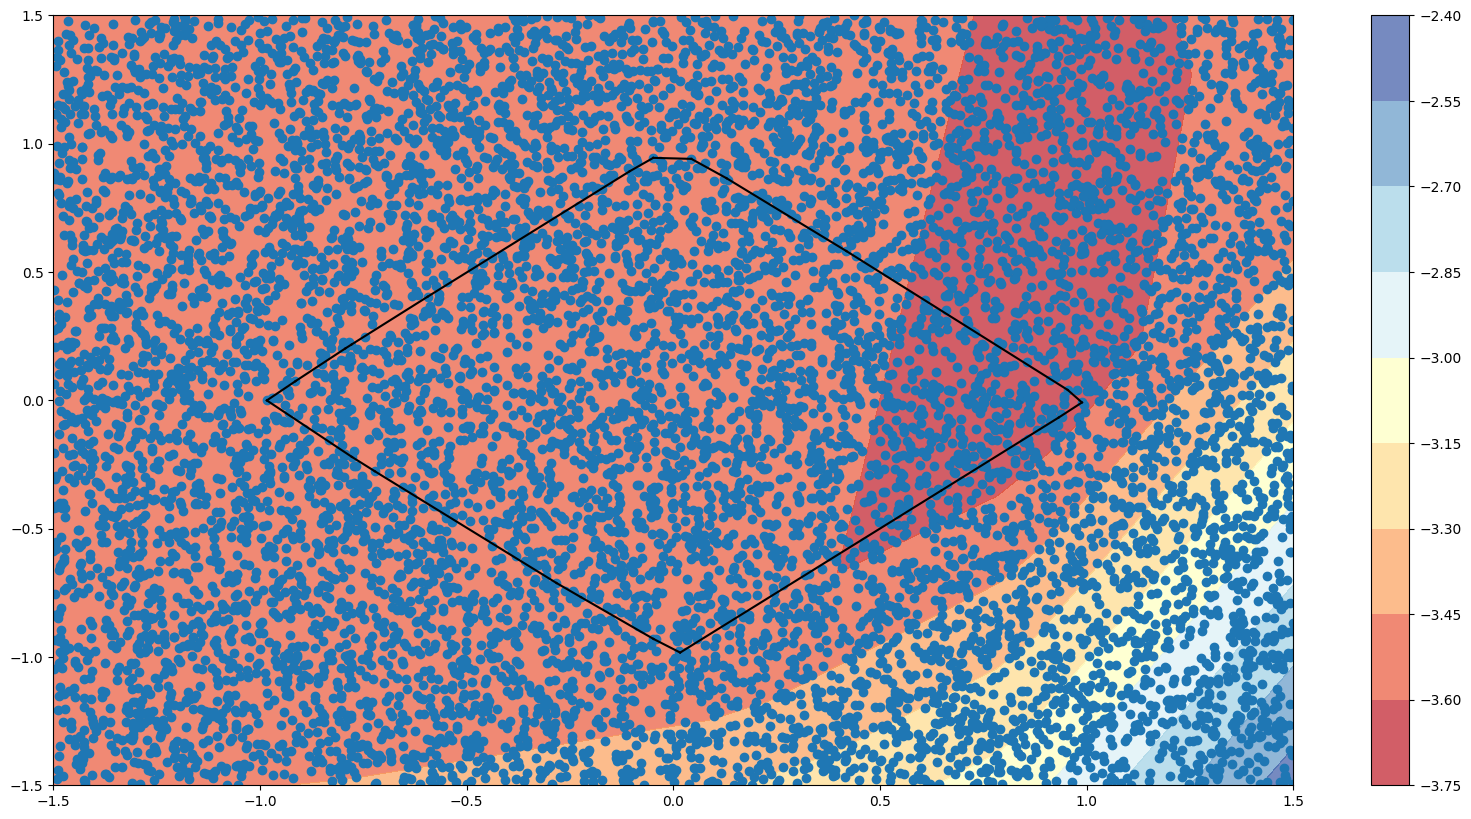

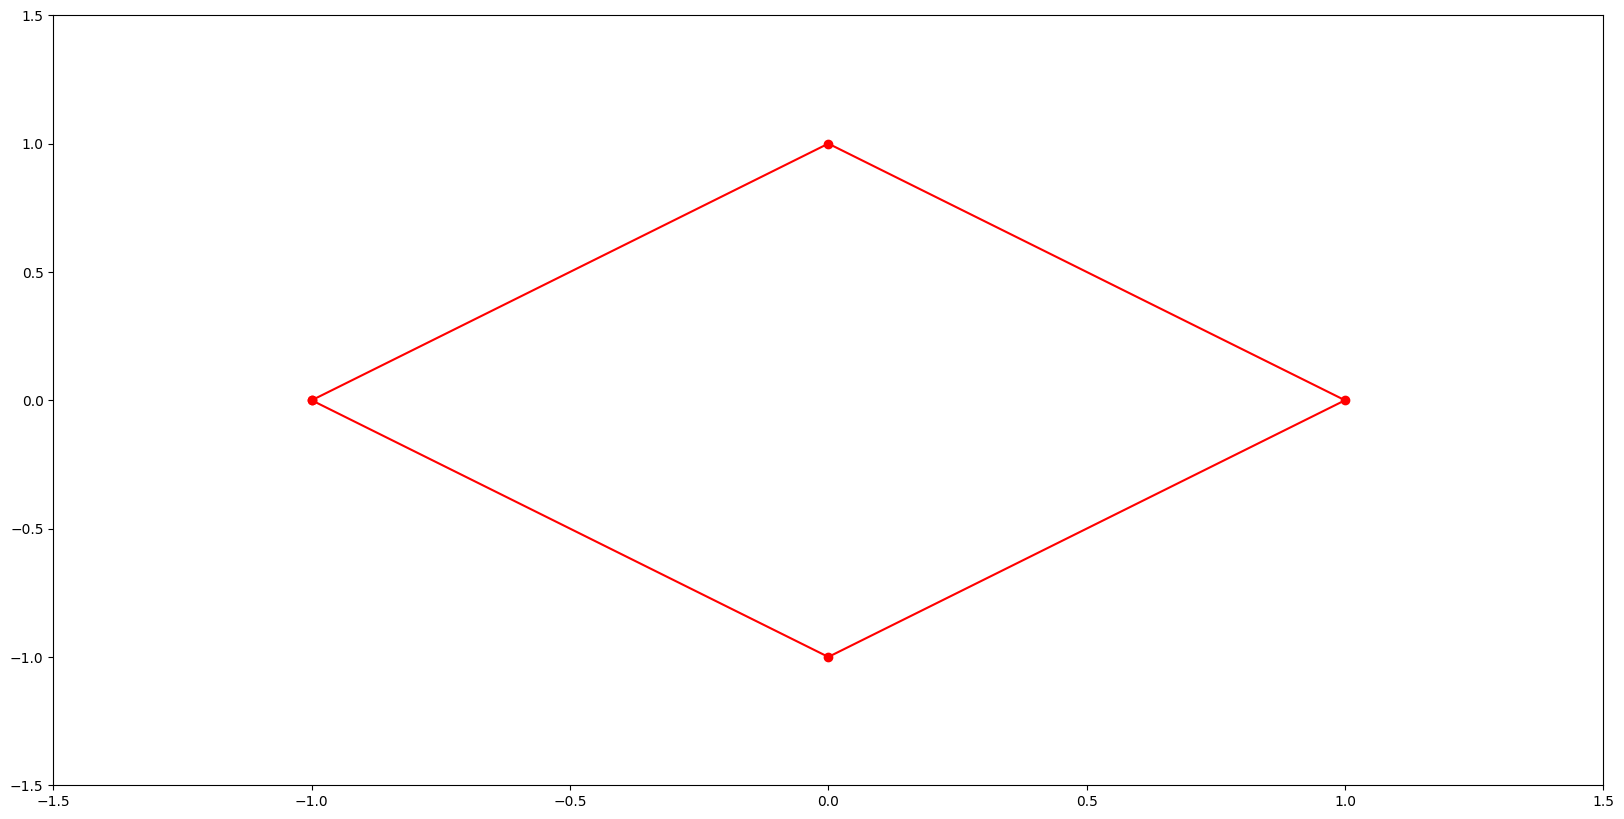

In [8]:
plots.plt_mesh()
plots.plt_adversarial_dotted()

In [9]:
A, b = Rhombus().get_A(), Rhombus().get_b()
result = verification(icnn, A_b=[A,b], sequential=False)

Set parameter Username
Academic license - for non-commercial use only - expires 2023-11-12
optimum solution at: [-1.  0.], with value [-3.55925175], true output: 0


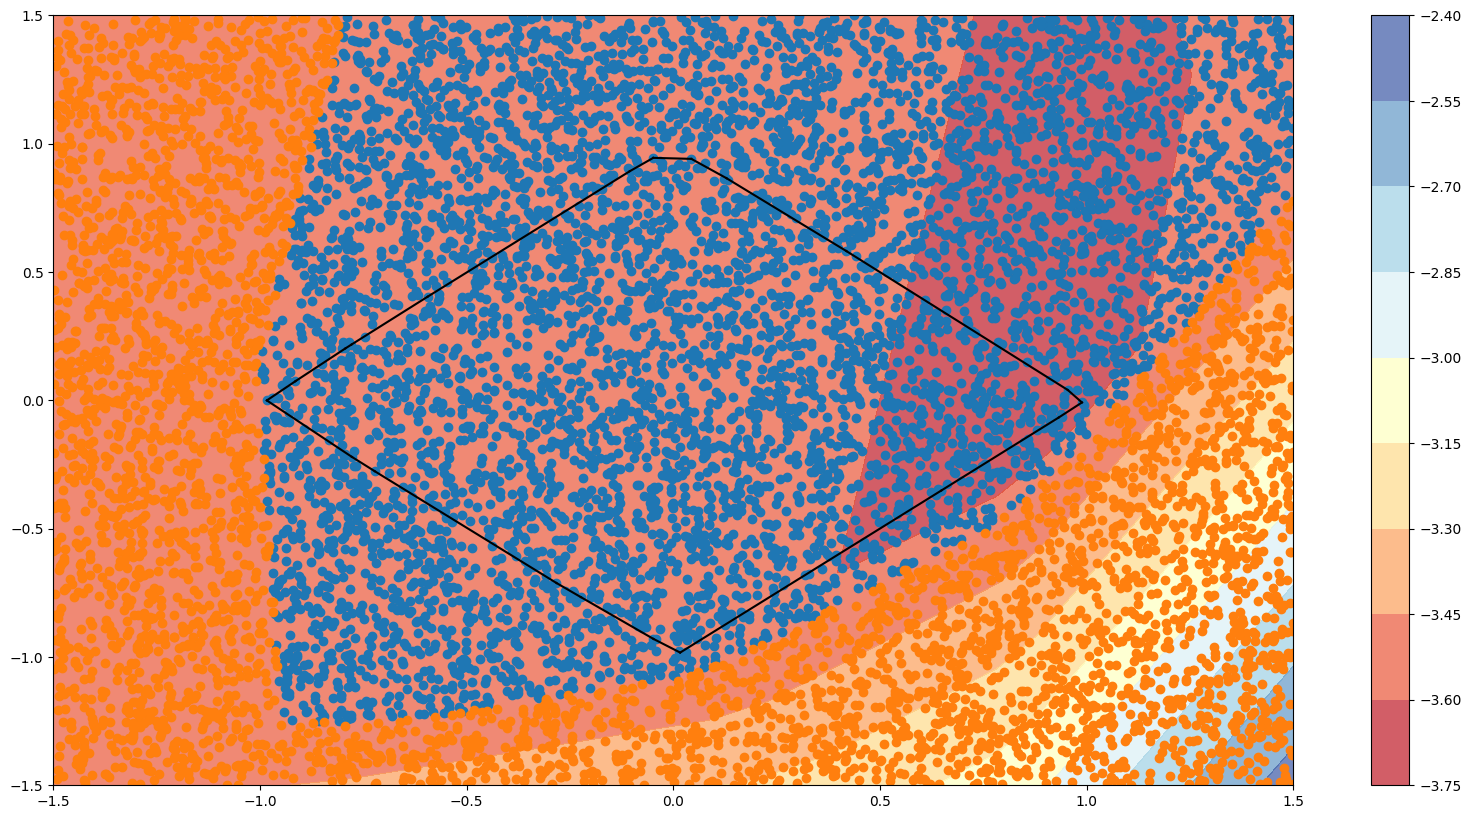

In [10]:
input_data, plots.c = result
plots.plt_mesh()